In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.isnull().dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


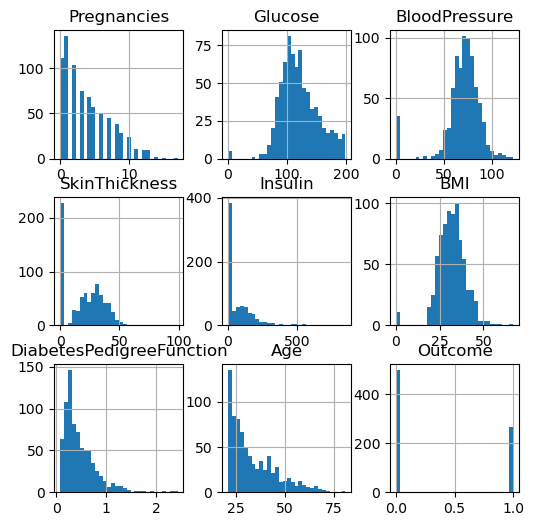

In [7]:
data.hist(bins=30,figsize=(6,6))
plt.show()

In [8]:
x=data.drop(columns=['Outcome'])
y=data["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
preprocess_pipline= Pipeline([
    ("scaler",StandardScaler())
])

In [10]:
X_train_prepared=preprocess_pipline.fit_transform(x_train)
X_test_prepared=preprocess_pipline.transform(x_test)

In [11]:
model= LogisticRegression()
model.fit(X_train_prepared,y_train)

LogisticRegression()

In [12]:
y_pred=model.predict(X_test_prepared)

In [13]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.67      0.65      0.66        57

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [14]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [15]:
precision_score(y_test,y_pred)

0.6491228070175439

In [16]:
recall_score(y_test,y_pred)

0.6727272727272727

In [17]:
confusion_matrix(y_test,y_pred)

array([[79, 20],
       [18, 37]], dtype=int64)

In [18]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_prepared,y_train)


KNeighborsClassifier()

In [19]:
y_pred_knn=knn_model.predict(X_test_prepared)

In [20]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       106
           1       0.51      0.58      0.54        48

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.71      0.69      0.70       154



In [21]:
accuracy_score(y_test,y_pred_knn)

0.6948051948051948

In [22]:
precision_score(y_test,y_pred_knn)

0.5833333333333334

In [23]:
recall_score(y_test,y_pred_knn)

0.509090909090909

In [24]:
confusion_matrix(y_test,y_pred_knn)

array([[79, 20],
       [27, 28]], dtype=int64)

In [25]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_prepared,y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred_rf=rf_model.predict(X_test_prepared)

In [27]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        98
           1       0.62      0.61      0.61        56

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [28]:
 y_prob=model.predict_proba(X_test_prepared)[:,1]
threshold=0.6
y_pred_new=(y_prob>=threshold).astype(int)

In [29]:
accuracy_score(y_test,y_pred_new)

0.7857142857142857

In [30]:
print(classification_report(y_pred_new,y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       110
           1       0.60      0.75      0.67        44

    accuracy                           0.79       154
   macro avg       0.74      0.78      0.75       154
weighted avg       0.81      0.79      0.79       154



In [31]:
confusion_matrix(y_test,y_pred_new)

array([[88, 11],
       [22, 33]], dtype=int64)

In [32]:
precision_score(y_pred_new,y_test)

0.6

In [33]:
recall_score(y_pred_new,y_test)

0.75

In [34]:
new_data=data.iloc[0]
sample=new_data.drop('Outcome').values.reshape(1,-1)
sample_scaled=preprocess_pipline.transform(sample)
new_data

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [35]:

sample_pred=model.predict(sample_scaled)
sample_pred

array([1], dtype=int64)

In [36]:
if sample_pred[0]==1:
    print("posetive")
else:
    print('negetive')

posetive


In [37]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64